# ---------------------------- Experiment SoA DATA ANALYSIS ----------------------------

In [1]:
import SoA_DataPreparation as dataprep

In [2]:
import numpy as np
import pandas as pd

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## DataFrame preparation

In [5]:
df = dataprep.DF_prep()

df.head()

Number of rows = 20651
Number of persons = 31
Persons' numbers = ['005' '008' '009' '016' '019' '022' '023' '024' '026' '028' '029' '038'
 '052' '055' '065' '069' '070' '074' '077' '080' '084' '086' '088' '091'
 '093' '096' '098' '099' '103' '105' '117']
{'Group_1': 15, 'Group_2': 16}


,Unnamed: 0,cond,choiceType,prime,target,effect,corrResp,resp,pos,block,...,RT,soa_rating,rating_RT,delay1,delay2,ITI,saveTime,subject_nr,block_nr,group_nr
0,1,comp,Free,prime_right.png,target_both.png,red,dl,l,-5.0,1,...,0.516441,1,7.214,46.0,104.0,67.0,0.003275,005,1,1
1,2,comp,Cued,prime_left.png,target_left.png,blue,d,d,5.0,1,...,0.310004,6,2.362,50.0,125.0,29.0,0.003189,005,1,1
2,3,comp,Cued,prime_left.png,target_left.png,blue,d,d,-5.0,1,...,0.464200,6,1.602,43.0,91.0,61.0,0.003173,005,1,1
3,4,comp,Cued,prime_left.png,target_left.png,blue,d,d,-5.0,1,...,0.556996,6,1.131,53.0,83.0,46.0,0.003183,005,1,1
4,5,incomp,Cued,prime_right.png,target_left.png,yellow,d,d,-5.0,1,...,0.538340,5,1.171,53.0,124.0,48.0,0.003187,005,1,1


In [6]:
df.columns

Index(['Unnamed: 0', 'cond', 'choiceType', 'prime', 'target', 'effect',
       'corrResp', 'resp', 'pos', 'block', 'fixTime', 'ifcorr', 'RT',
       'soa_rating', 'rating_RT', 'delay1', 'delay2', 'ITI', 'saveTime',
       'subject_nr', 'block_nr', 'group_nr'],
      dtype='object')

## Basic plots

In [7]:
df_clean = df.query('ifcorr == True')

Text(0.5,0,'Rodzaj strzałki')

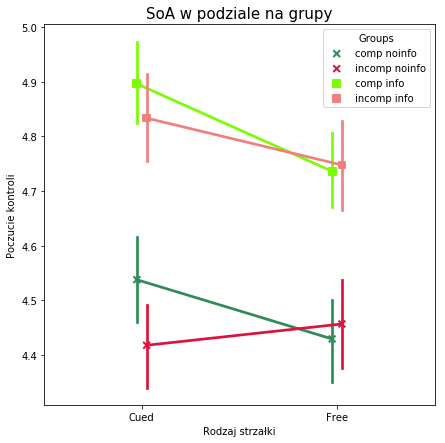

In [8]:
plt.figure(1, figsize=(7, 7))

axis = sns.pointplot(x='choiceType', y='soa_rating', order=('Cued', 'Free'), hue='cond', hue_order=('comp', 'incomp'), 
                         data=df_clean.query('group_nr == 1'), palette=('seagreen', 'crimson'), dodge=True,
                         markers=["x", "x"])

axis = sns.pointplot(x='choiceType', y='soa_rating', order=('Cued', 'Free'), hue='cond', hue_order=('comp', 'incomp'), 
                         data=df_clean.query('group_nr == 2'), palette=('lawngreen', 'lightcoral'), dodge=True,
                         markers=["s", "s"])

leg_handles = axis.get_legend_handles_labels()[0]
axis.legend(leg_handles, ['comp noinfo', 'incomp noinfo','comp info', 'incomp info'], title='Groups')

axis.set_title('SoA w podziale na grupy', fontsize=15)
axis.set_ylabel("Poczucie kontroli")
axis.set_xlabel(u"Rodzaj strzałki")

Text(0.5,0,'Rodzaj strzałki')

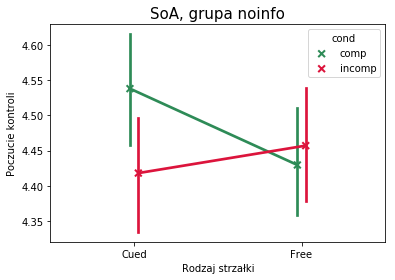

In [9]:
axis = sns.pointplot(data=df_clean.query('group_nr == 1'), x='choiceType', y='soa_rating', order=('Cued', 'Free'), hue='cond', 
                     hue_order=('comp', 'incomp'), palette=('seagreen', 'crimson'), dodge=True,
                         markers=["x", "x"])

axis.set_title('SoA, grupa noinfo', fontsize=15)
axis.set_ylabel("Poczucie kontroli")
axis.set_xlabel(u"Rodzaj strzałki")

Text(0.5,0,'Rodzaj strzałki')

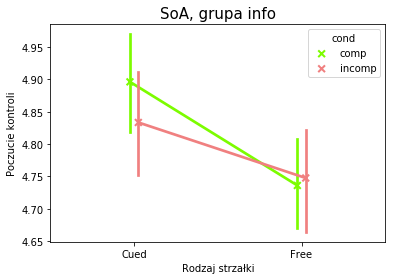

In [10]:
axis = sns.pointplot(data=df_clean.query('group_nr == 2'), x='choiceType', y='soa_rating', order=('Cued', 'Free'), hue='cond', 
                     hue_order=('comp', 'incomp'), palette=('lawngreen', 'lightcoral'), dodge=True,
                         markers=["x", "x"])

axis.set_title('SoA, grupa info', fontsize=15)
axis.set_ylabel("Poczucie kontroli")
axis.set_xlabel(u"Rodzaj strzałki")